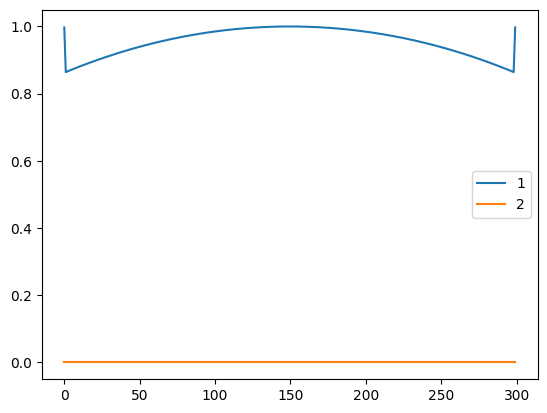

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def FDTD(pnow,pold,h,dt):
    return 2*pnow[1:-1] - pold[1:-1] + (dt**2)*(h**(-2))*np.diff(pnow,2)

Nx = 300; # Points of divcretization
m = 10; # Multiple for dt
x = np.linspace(-0.5,0.5,Nx); # x grid
h = abs(x[2]-x[1]);
dt = 1;
t = np.arange(0,100,dt) # time grid
pnow = np.zeros([len(x),len(t)])
pnow[:,0]=np.cos(-x**2*0.3); # Initialize
pold=np.cos(-x**2*0.3); 


for i in range(len(t)-1):
    #print(i)
    pnew = FDTD(pnow[:,i],pold,h,dt)
    pold = pnow[:,i];
    pnow[1:-1,i] = pnew;
plt.plot(pnow[:,0])
plt.plot(pnow[:,-1])
plt.legend(['1','2'])

   

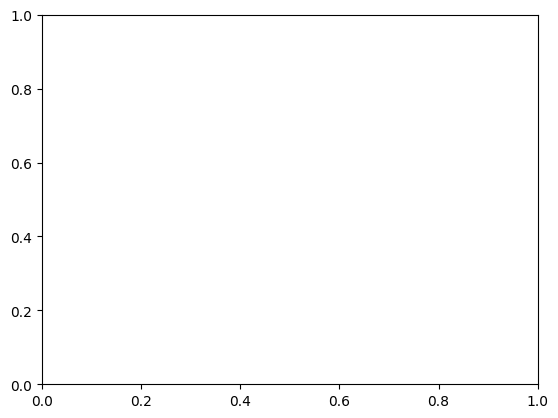

In [11]:
fig = plt.figure();
ax = fig.add_subplot()

def update(i):
    ax.clear();
    ax.scatter(x,pnow[:,i]);
    ax.set_xlim(-2, 4)
    ax.set_ylim(-3, 3)
    ax.text(2,2,f't = {round(t[i],2)}')
    ax.set_aspect('equal')

ani = animation.FuncAnimation(fig, update,frames = np.arange(0, len(t), 100), interval = 33.3)
plt.show()



u(-0.5,0) = c1*(0+0.5)+c2*(0-0.5) = 0 ==> c1 = c2
u(0.5,0) = c1*(0-0.5)+c1*(0+0.5) = 0